In [131]:
import numpy as np
import math
import csv
import matplotlib.pyplot as plt
import random

In [132]:
i,trainArrX,trainArrY = np.loadtxt('lab_1_train.csv', unpack = True, delimiter =',',skiprows=1)
i,testArrX,testArrY = np.loadtxt('lab_1_test.csv', unpack = True, delimiter =',',skiprows=1)
arrSize = len(trainArrX)
arrSize2 = len(testArrX)

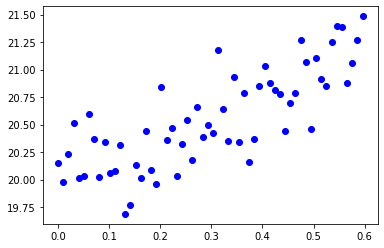

In [133]:
#Візуалізувати дані з lab1_train.csv.
plt.plot(trainArrX,trainArrY,'bo') # plot x and y using blue circle markers

In [134]:
def prediction(x,B0,B1):
    return B0 + B1 * x


In [135]:
def lossFunc(arrayX,arrayY,B0,B1,size):
    sum = 0
    for i in range(size):
        sum += (arrayY[i] - prediction(arrayX[i],B0,B1))**2
    return sum/(2*size)

In [136]:
#математичне обчислення ваг
def idealB(arrayX,arrayY,size):
    xSum=0
    ySum=0
    xySum=0
    xxSum=0
    for i in range(ArrSize):
        xSum += arrayX[i]
        ySum += arrayY[i] 
        xySum += (arrayX[i] * arrayY[i])
        xxSum += (arrayX[i] * arrayX[i])
    
    idealB1 = (xySum - ((1/size) * xSum * ySum))/(xxSum - ((1/size) * xSum * xSum))
    #idealB0 = arrayY[0]- idealB1*arrayX[0]
    idealB0 = ySum/size- idealB1*xSum/size
    print("+-----------------------ideal B1 B0------------------------+")
    print("|Ideal B0 =",idealB0,"Ideal B1 =",idealB1,"|")
    print("+----------------------------------------------------------+")
    
idealB(trainArrX,trainArrY,arrSize)

+-----------------------ideal B1 B0------------------------+
|Ideal B0 = 19.95992525006205 Ideal B1 = 1.978784954463181 |
+----------------------------------------------------------+


In [137]:
def gradSumB0(arrayX,arrayY,B0,B1,arrSize):
    sum = 0
    for i in range(arrSize):
        sum += prediction(arrayX[i],B0,B1) - arrayY[i]
    return sum

In [138]:
def gradSumB1(arrayX,arrayY,B0,B1,arrSize):
    sum = 0
    for i in range(arrSize):
        sum += (prediction(arrayX[i],B0,B1) - arrayY[i])*arrayX[i]
    return sum

In [139]:
tolorance = 0.001 #
prevB0 = random.uniform (0,10)
prevB1 = random.uniform (0,10)
B0 = 0
B1 = 0
alpha = 1;
i=0
while((math.fabs(B0- prevB0)>tolorance) or (math.fabs(B0- prevB0)>tolorance)):
    prevB0 = B0
    prevB1 = B1
    i+=1
    B0 = prevB0 - alpha*(1/arrSize*gradSumB0(trainArrX,trainArrY,prevB0,prevB1,arrSize))
    B1 = prevB1 - alpha*(1/arrSize*gradSumB1(trainArrX,trainArrY,prevB0,prevB1,arrSize))
    print(i,") B0=",B0,"   B1=",B1," Loss=",lossFunc(trainArrX,trainArrY,B0,B1,arrSize))

    

1 ) B0= 20.54956319103845    B1= 6.183906732682434  Loss= 2.0048071214709076
2 ) B0= 18.706883912107823    B1= 5.506146204086595  Loss= 0.24728193650414668
3 ) B0= 18.908842857497493    B1= 5.458386452213757  Loss= 0.22186923480678178
4 ) B0= 18.923074298712127    B1= 5.356149174541443  Loss= 0.21150592425504916
5 ) B0= 18.953538942058927    B1= 5.261877587141096  Loss= 0.2018294904663977
6 ) B0= 18.98162997062772    B1= 5.1697834794158135  Loss= 0.19268903729498915
7 ) B0= 19.00907215424283    B1= 5.080314165703528  Loss= 0.18405398690159822
8 ) B0= 19.035732202268207    B1= 4.993349607765931  Loss= 0.1758963866411655
9 ) B0= 19.061645883673854    B1= 4.908823816956369  Loss= 0.16818983722773398
10 ) B0= 19.08683286174337    B1= 4.826668024752438  Loss= 0.16090939911237925
11 ) B0= 19.111313628107165    B1= 4.746815813821705  Loss= 0.15403151170674464
12 ) B0= 19.135107973788546    B1= 4.669202590476455  Loss= 0.1475339171368767
13 ) B0= 19.158235146401527    B1= 4.593765575710808  Lo

In [140]:
loss = lossFunc(trainArrX,trainArrY,B0,B1,arrSize)
loss2 = lossFunc(testArrX,testArrY,B0,B1,arrSize2)
print("Final result Loss function for lab_1_train.csv :",loss)
print("Final result Loss function for lab_1_test.csv :",loss2)

Final result Loss function for lab_1_train.csv : 0.036707515870773325
Final result Loss function for lab_1_test.csv : 0.0368725635044684


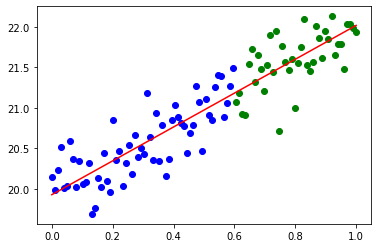

In [141]:
x0 = trainArrX[0]
y0 = prediction(x0,B0,B1)

x1 = testArrX[arrSize2-1]
y1 = prediction(x1,B0,B1)


plt.plot(trainArrX,trainArrY,'bo')
plt.plot (testArrX, testArrY,'go')
plt.plot ([x0,x1],[y0,y1], 'red')